In [1]:
# loading the required libraries 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from statsmodels.formula.api import ols
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from xgboost import XGBRegressor

In [2]:
#Changing the directoy
os.chdir("C:\manideep\edwisor\Project - 3")
os.getcwd()

'C:\\manideep\\edwisor\\Project - 3'

In [3]:
#Loading the csv
cab_fare =  pd.read_csv('train_cab.csv')
cab_fare_test = pd.read_csv('test.csv')

In [4]:
cab_fare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16067 entries, 0 to 16066
Data columns (total 7 columns):
fare_amount          16043 non-null object
pickup_datetime      16067 non-null object
pickup_longitude     16067 non-null float64
pickup_latitude      16067 non-null float64
dropoff_longitude    16067 non-null float64
dropoff_latitude     16067 non-null float64
passenger_count      16012 non-null float64
dtypes: float64(5), object(2)
memory usage: 878.8+ KB


# EDA

In [5]:
# Converting to the required formats
cab_fare.fare_amount = pd.to_numeric(cab_fare.fare_amount, errors='coerce')
#cab_fare['passenger_count'] = pd.Categorical(cab_fare.passenger_count)
cab_fare['pickup_datetime'] = pd.to_datetime(cab_fare.pickup_datetime, errors='coerce')

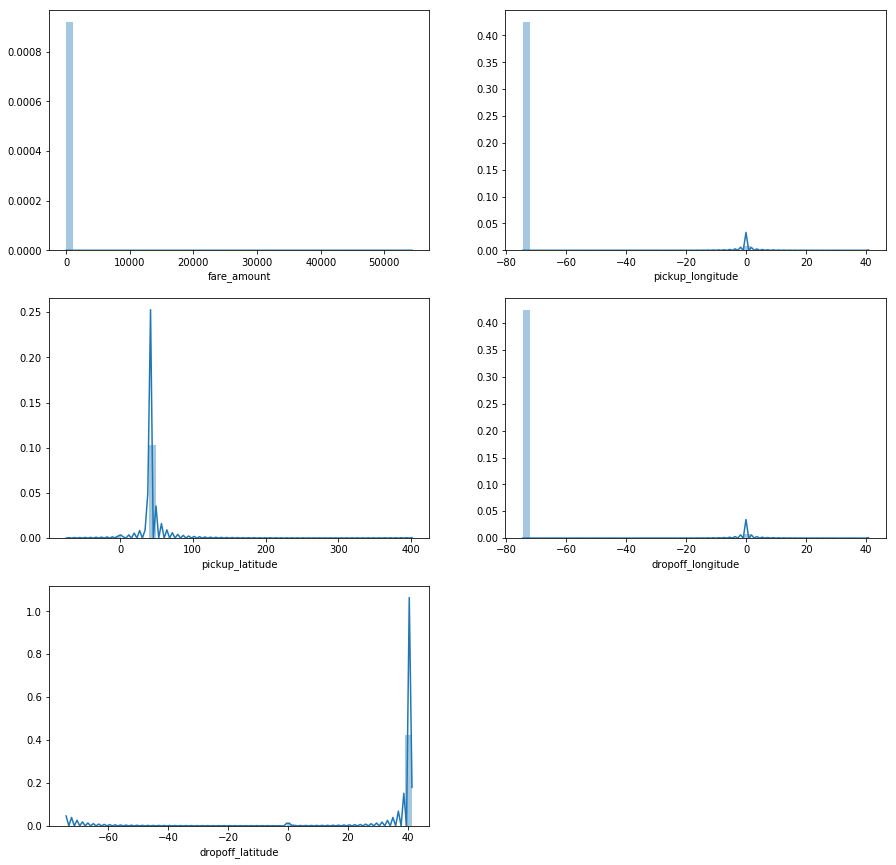

In [6]:
plt.figure(figsize=(15,15))
plt.subplot(321)
sns.distplot(cab_fare['fare_amount'],bins=50)
plt.subplot(322)
sns.distplot(cab_fare['pickup_longitude'],bins=50)
plt.subplot(323)
sns.distplot(cab_fare['pickup_latitude'],bins=50)
plt.subplot(324)
sns.distplot(cab_fare['dropoff_longitude'],bins=50)
plt.subplot(325)
sns.distplot(cab_fare['dropoff_latitude'],bins=50)
plt.show()

# bi-varient analysis

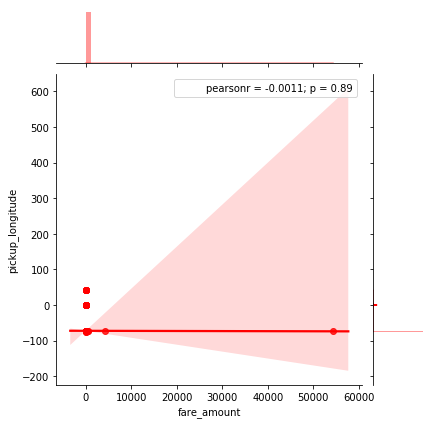

In [7]:
p2 = sns.jointplot(x='fare_amount',y='pickup_longitude',data=cab_fare,kind = 'reg',dropna = True,color = 'red')
p2.annotate(stats.pearsonr)
plt.show()

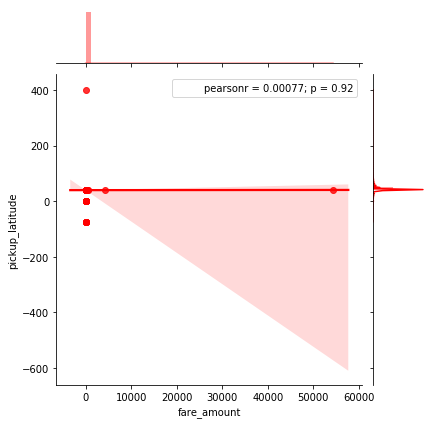

In [8]:
p1 = sns.jointplot(x='fare_amount',y='pickup_latitude',data=cab_fare,kind = 'reg',dropna = True,color = 'red')
p1.annotate(stats.pearsonr)
plt.show()

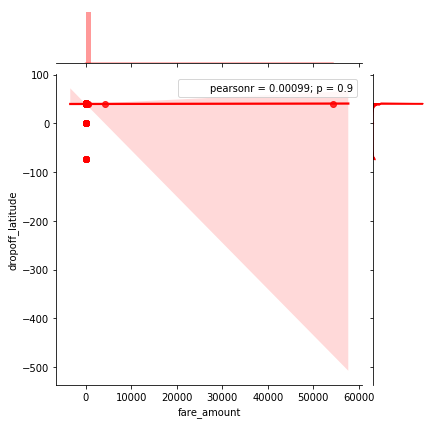

In [9]:
p3 = sns.jointplot(x='fare_amount',y='dropoff_latitude',data=cab_fare,kind = 'reg',dropna = True,color = 'red')
p3.annotate(stats.pearsonr)
plt.show()

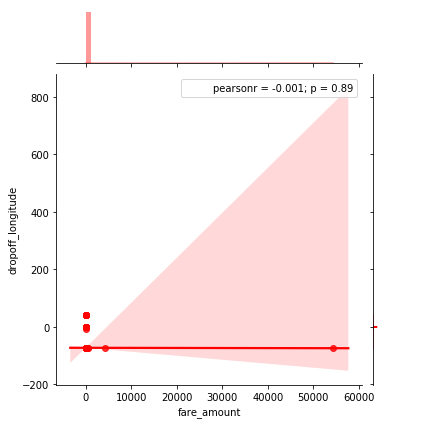

In [10]:
p4 = sns.jointplot(x='fare_amount',y='dropoff_longitude',data=cab_fare,kind = 'reg',dropna = True,color = 'red')
p4.annotate(stats.pearsonr)
plt.show()

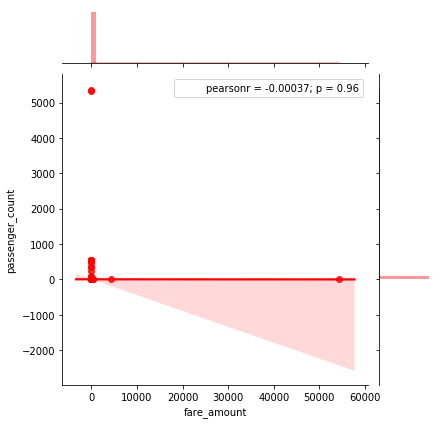

In [11]:
p5 = sns.jointplot(x='fare_amount',y='passenger_count',data=cab_fare,kind = 'reg',dropna = True,color = 'red')
p5.annotate(stats.pearsonr)
plt.show()

In [12]:
cab_fare[cab_fare['fare_amount']<1]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2039,-2.90,2010-03-09 23:37:10+00:00,-73.789450,40.643498,-73.788665,40.641952,1.0
2486,-2.50,2015-03-22 05:14:27+00:00,-74.000031,40.720631,-73.999809,40.720539,1.0
2780,0.01,2015-05-01 15:38:41+00:00,-73.939041,40.713963,-73.941673,40.713997,1.0
10002,0.00,2010-02-15 14:26:01+00:00,-73.987115,40.738808,-74.005911,40.713960,1.0
13032,-3.00,2013-08-30 08:57:10+00:00,-73.995062,40.740755,-73.995885,40.741357,4.0


In [13]:
cab_fare = cab_fare.drop(cab_fare[cab_fare['fare_amount']<1].index, axis=0)

In [14]:
cab_fare[cab_fare['passenger_count']>6]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
233,8.5,2011-07-24 01:14:35+00:00,0.000000,0.000000,0.000000,0.000000,236.0
263,4.9,2010-07-12 09:44:33+00:00,-73.983249,40.734655,-73.991278,40.738918,456.0
293,6.1,2011-01-18 23:48:00+00:00,-74.006642,40.738927,-74.010828,40.717907,5334.0
356,8.5,2013-06-18 10:27:05+00:00,-73.992108,40.764203,-73.973000,40.762695,535.0
386,8.1,2009-08-21 19:35:05+00:00,-73.960853,40.761557,-73.976335,40.748361,354.0
413,NaN,2013-09-12 11:32:00+00:00,-73.982060,40.772705,-73.956213,40.771777,55.0
971,10.1,2010-11-21 01:41:00+00:00,-74.004500,40.742143,-73.994330,40.720412,554.0
1007,3.7,2010-12-14 14:46:00+00:00,-73.969157,40.759000,-73.968763,40.764617,53.0
1043,5.7,2012-08-22 22:08:29+00:00,-73.973573,40.760184,-73.953564,40.767392,35.0
1107,4.9,2009-08-08 21:50:50+00:00,-73.988977,40.721068,-73.982368,40.732064,345.0


In [15]:
cab_fare[cab_fare['passenger_count']<1]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
314,34.0,2015-06-02 23:16:15+00:00,-73.974899,40.751095,-73.908546,40.881878,0.00
566,4.9,2012-01-28 21:33:18+00:00,-73.955322,40.782840,-73.955797,40.773673,0.00
678,6.5,2012-02-27 07:24:20+00:00,-73.983397,40.738183,-73.971395,40.758023,0.00
1160,13.3,2011-05-25 23:58:48+00:00,-73.998360,40.740348,-73.946455,40.777348,0.00
1935,10.1,2011-10-23 11:09:28+00:00,-73.971400,40.795000,-73.967900,40.768600,0.00
2200,8.1,2011-05-23 16:54:19+00:00,-73.988008,40.748303,-74.005185,40.738733,0.00
2425,8.9,2011-11-25 22:47:33+00:00,-73.999900,40.738600,-73.971800,40.746300,0.00
3034,5.7,2011-03-06 12:03:14+00:00,-73.986557,40.745783,-73.994545,40.729995,0.00
3413,7.3,2011-02-28 06:39:16+00:00,-73.973413,40.743708,-73.985220,40.741583,0.00
3481,11.3,2011-11-30 17:23:02+00:00,-73.968100,40.762500,-73.984400,40.760900,0.00


In [16]:
cab_fare = cab_fare.drop(cab_fare[cab_fare['passenger_count']>6].index, axis=0)
cab_fare = cab_fare.drop(cab_fare[cab_fare['passenger_count']<1].index, axis=0)

In [17]:
print('pickup_longitude above 180={}'.format(sum(cab_fare['pickup_longitude']>180)))
print('pickup_longitude below -180={}'.format(sum(cab_fare['pickup_longitude']<-180)))
print('pickup_latitude above 90={}'.format(sum(cab_fare['pickup_latitude']>90)))
print('pickup_latitude below -90={}'.format(sum(cab_fare['pickup_latitude']<-90)))
print('dropoff_longitude above 180={}'.format(sum(cab_fare['dropoff_longitude']>180)))
print('dropoff_longitude below -180={}'.format(sum(cab_fare['dropoff_longitude']<-180)))
print('dropoff_latitude below -90={}'.format(sum(cab_fare['dropoff_latitude']<-90)))
print('dropoff_latitude above 90={}'.format(sum(cab_fare['dropoff_latitude']>90)))

pickup_longitude above 180=0
pickup_longitude below -180=0
pickup_latitude above 90=1
pickup_latitude below -90=0
dropoff_longitude above 180=0
dropoff_longitude below -180=0
dropoff_latitude below -90=0
dropoff_latitude above 90=0


In [18]:
cab_fare = cab_fare.drop(cab_fare[cab_fare['pickup_latitude']>90].index, axis=0)

In [19]:
for i in ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']:
    cab_fare = cab_fare.drop(cab_fare[cab_fare[i]==0].index, axis=0)

In [20]:
cab_fare['passenger_count'] = cab_fare['passenger_count'].drop(cab_fare[cab_fare['passenger_count'] == 1.3].index, axis=0)
cab_fare.shape


(15661, 7)

# Pre Processing

In [21]:
#Calculating the null values in the dataframe
missing_val = pd.DataFrame(cab_fare.isnull().sum())
missing_val = (missing_val/len(cab_fare))*100
missing_val.reset_index()

missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percent'})
missing_val


,Missing_percent
fare_amount,0.140476
pickup_datetime,0.006385
pickup_longitude,0.000000
pickup_latitude,0.000000
dropoff_longitude,0.000000
dropoff_latitude,0.000000
passenger_count,0.357576


In [22]:
#For fare_amount
#Checking which type of imputation is efficient
print('fare_amount:{}'.format(cab_fare['fare_amount'].loc[99]))
cab_fare['fare_amount'].loc[99] = np.nan
#Impute using mean
print('Mean imputation:{}'.format(cab_fare['fare_amount'].fillna(cab_fare['fare_amount'].mean()).loc[99]))
#Impute using median
print('Median imputation:{}'.format(cab_fare['fare_amount'].fillna(cab_fare['fare_amount'].median()).loc[99]))

fare_amount:5.7
Mean imputation:15.118279191712348
Median imputation:8.5


In [23]:
print('passenger_count:{}'.format(cab_fare['passenger_count'].loc[99]))
cab_fare['passenger_count'].loc[99] = np.nan
#Impute using mean
print('Mean imputation:{}'.format(cab_fare['passenger_count'].fillna(cab_fare['passenger_count'].mean()).loc[99]))
#Impute using median
print('Median imputation:{}'.format(cab_fare['passenger_count'].fillna(cab_fare['passenger_count'].median()).loc[99]))

passenger_count:3.0
Mean imputation:1.650474237375032
Median imputation:1.0


In [24]:
#Median imputation
cab_fare['passenger_count'] = cab_fare['passenger_count'].replace({0:np.nan})
cab_fare['passenger_count'] = cab_fare['passenger_count'].fillna(cab_fare['passenger_count'].median())
cab_fare['fare_amount'] = cab_fare['fare_amount'].fillna(cab_fare['fare_amount'].median())

In [25]:
cab_fare['passenger_count']=cab_fare['passenger_count'].astype('category')

### box plot analysis

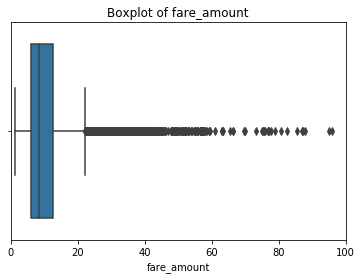

In [27]:
#box plot 
plt.xlim(0,100)
sns.boxplot(x=cab_fare['fare_amount'],data=cab_fare)
plt.title('Boxplot of fare_amount')
plt.show()

In [28]:
cnames=['fare_amount','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']
#detect & delete outliers
for i in cnames:
    print(i)
    q75, q25 = np.percentile(cab_fare.loc[:,i], [75 ,25])
    iqr = q75 - q25

    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    print(min)
    print(max)
    
    cab_fare = cab_fare.drop(cab_fare[cab_fare.loc[:,i] < min].index)
    cab_fare = cab_fare.drop(cab_fare[cab_fare.loc[:,i] > max].index)

fare_amount
-3.75
22.25
pickup_longitude
-74.02676449999998
-73.93576850000002
pickup_latitude
40.69332351
40.811026150000004
dropoff_longitude
-74.0257176125
-73.93545423249999
dropoff_latitude
40.694096125000016
40.81140912499998


In [29]:
cab_fare.shape

(13207, 7)

### Feature Engineering

In [31]:
#Extracting from pickup_datetime
import datetime
cab_fare['year'] = cab_fare['pickup_datetime'].dt.year
cab_fare['month'] = cab_fare['pickup_datetime'].dt.month
cab_fare['day'] = cab_fare['pickup_datetime'].dt.day
cab_fare['hour'] = cab_fare['pickup_datetime'].dt.hour

In [32]:
cab_fare_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 6 columns):
pickup_datetime      9914 non-null object
pickup_longitude     9914 non-null float64
pickup_latitude      9914 non-null float64
dropoff_longitude    9914 non-null float64
dropoff_latitude     9914 non-null float64
passenger_count      9914 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 464.8+ KB


In [33]:
#Performing conversions and extractions on test data
cab_fare_test['passenger_count'] = cab_fare_test['passenger_count'].astype('category')
cab_fare_test['pickup_datetime'] = pd.to_datetime(cab_fare_test.pickup_datetime, errors='coerce')
cab_fare_test['year'] = cab_fare_test['pickup_datetime'].dt.year
cab_fare_test['month'] = cab_fare_test['pickup_datetime'].dt.month
cab_fare_test['day'] = cab_fare_test['pickup_datetime'].dt.day
cab_fare_test['hour'] = cab_fare_test['pickup_datetime'].dt.hour

In [34]:
#calculating distance
from geopy.distance import geodesic

data = [cab_fare, cab_fare_test]
for i in data:
    i['total_dis']=i.apply(lambda x: geodesic((x['pickup_latitude'],x['pickup_longitude']), (x['dropoff_latitude'],   x['dropoff_longitude'])).kilometers, axis=1)

In [35]:
cab_fare


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,total_dis
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,5.0,16.0,8.443441
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,0.0,1.389132
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,4.0,2.795790
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,9.0,7.0,1.998338
5,12.1,2011-01-06 09:50:45+00:00,-74.000964,40.731630,-73.972892,40.758233,1.0,2011.0,1.0,6.0,9.0,3.787980
6,7.5,2012-11-20 20:35:00+00:00,-73.980002,40.751662,-73.973802,40.764842,1.0,2012.0,11.0,20.0,20.0,1.554446
7,16.5,2012-01-04 17:22:00+00:00,-73.951300,40.774138,-73.990095,40.751048,1.0,2012.0,1.0,4.0,17.0,4.159930
8,8.5,2012-12-03 13:10:00+00:00,-74.006462,40.726713,-73.993078,40.731628,1.0,2012.0,12.0,3.0,13.0,1.255507
9,8.9,2009-09-02 01:11:00+00:00,-73.980658,40.733873,-73.991540,40.758138,2.0,2009.0,9.0,2.0,1.0,2.847028
10,5.3,2012-04-08 07:30:50+00:00,-73.996335,40.737142,-73.980721,40.733559,1.0,2012.0,4.0,8.0,7.0,1.377637


In [36]:
#dropping variables
cab_fare=cab_fare.drop(['pickup_datetime','pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude'],axis=1)
cab_fare_test=cab_fare_test.drop(['pickup_datetime','pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude'],axis=1)

In [37]:
#checking for missing values
pd.DataFrame(cab_fare.isna().sum())

,0
fare_amount,0
passenger_count,0
year,1
month,1
day,1
hour,1
total_dis,0


In [38]:
#Imputation
cab_fare['year'] = cab_fare['year'].fillna(cab_fare['year'].median())
cab_fare['month'] = cab_fare['month'].fillna(cab_fare['month'].median())
cab_fare['day'] = cab_fare['day'].fillna(cab_fare['day'].median())
cab_fare['hour'] = cab_fare['hour'].fillna(cab_fare['hour'].median())

### Feature selection

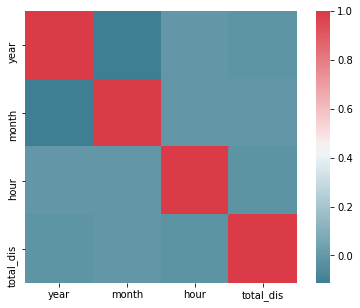

In [39]:
#Feature selection(Correlation, multicollinearity)
#Correlation Plot
cnames1 = ['year','month','hour','total_dis']
corr = cab_fare.loc[:,cnames1]
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr1 = corr.corr()

#Plot using seaborn library
sns.heatmap(corr1, mask=np.zeros_like(corr1, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)


In [40]:
#ANOVA
model_anova = ols('fare_amount ~ passenger_count', data=cab_fare).fit()
model_anova.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            fare_amount   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.650
Date:                Sun, 25 Aug 2019   Prob (F-statistic):            0.00266
Time:                        20:54:01   Log-Likelihood:                -36450.
No. Observations:               13207   AIC:                         7.291e+04
Df Residuals:                   13201   BIC:                         7.296e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  8.5312      0.040    215.976      0.000       8.454       8.609
passenger_count[T.2.0]     0.1211      0.096      1.256      0.209      -0.068       0.310
passenger_count[T.3.0]     0.2661      0.167      1.594      0.111      -0.061       0.593
passenger_count[T.4.0]     0.5188      0.236      2.198      0.028       0.056       0.981
passenger_count[T.5.0]    -0.0630      0.136     -0.464      0.642      -0.329       0.203
passenger_count[T.6.0]     0.7886      0.244      3.231      0.001       0.310       1.267
==============================================================================
Omnibus:                     1970.332   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2999.004
Skew:                           1.081   Prob(JB):                         0.00
Kurtosis:                       3.880   Cond. No.                         7.51
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
output,predictors = dmatrices('fare_amount ~ passenger_count+year+month+hour+total_dis',cab_fare, return_type='dataframe')
# calculating VIF for each individual Predictors
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])]
vif["features"] = predictors.columns
vif

,VIF,features
0,1.194667e+06,Intercept
1,1.031670e+00,passenger_count[T.2.0]
2,1.015956e+00,passenger_count[T.3.0]
3,1.008254e+00,passenger_count[T.4.0]
4,1.024290e+00,passenger_count[T.5.0]
5,1.016445e+00,passenger_count[T.6.0]
6,1.026071e+00,year
7,1.013791e+00,month
8,1.002295e+00,hour
9,1.001084e+00,total_dis


### Normality check

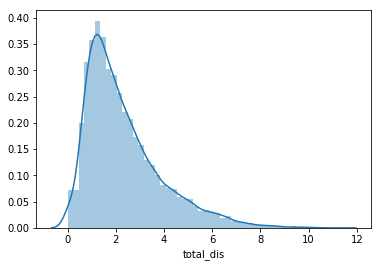

In [42]:
#normality check
sns.distplot(cab_fare['total_dis'],bins=50)

# Model development

In [43]:
#Divide data into train and test
X = cab_fare.values[:, 1:7]
Y = cab_fare.values[:,0]

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2)

In [44]:
#Metrics
def eval_metrics(a,b):
    print('MAPE:{}'.format(np.mean(np.abs((a - b) / a))*100))
    print('MSE:', metrics.mean_squared_error(a, b))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(a,b))) 
def test_eval_metrics(model):
    print('<<<------------------- Training Data Score --------------------->')
    print()
    #Predicting result on Training data
    y_pred = model.predict(X_train)
    eval_metrics(y_train,y_pred)
    print()
    print('<<<------------------- Test Data Score --------------------->')
    print()
    # Evaluating on Test Set
    y_pred = model.predict(X_test)
    eval_metrics(y_test,y_pred)

### Linear regression

In [45]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {'copy_X':[True, False],
          'fit_intercept':[True,False]}
# Instantiate a linear regression model
reg = LinearRegression()

# Instantiate the gridSearchCV object: reg_cv
reg_cv = GridSearchCV(reg, param_dist, cv=5,scoring='r2')

# Fit it to the data
reg_cv.fit(X, Y)

# Print the tuned parameters and score
print("Tuned Decision reg Parameters: {}".format(reg_cv.best_params_))
print("Best score is {}".format(reg_cv.best_score_))

Tuned Decision reg Parameters: {'copy_X': True, 'fit_intercept': True}
Best score is 0.6880111481676089


In [46]:
# Create the regressor: reg_all
reg_all = LinearRegression(copy_X= True, fit_intercept=True)

# Fit the regressor to the training data
reg_all.fit(X_train,y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))
test_eval_metrics(reg_all)

# Compute and print the coefficients
reg_coef = reg_all.coef_
print(reg_coef)

Root Mean Squared Error: 2.1322545942416933
<<<------------------- Training Data Score --------------------->

MAPE:19.044498147446927
MSE: 4.555057944170049
RMSE: 2.1342581718644182

<<<------------------- Test Data Score --------------------->

MAPE:18.55136232247832
MSE: 4.546509654664808
RMSE: 2.1322545942416933
[5.07719280e-02 3.65707469e-01 5.27730610e-02 7.92490310e-04
 1.17181796e-02 1.96841267e+00]


### Decision tree

In [47]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {'max_depth': range(2,16,2),
              'min_samples_split': range(2,16,2)}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeRegressor()

# Instantiate the gridSearchCV object: tree_cv
tree_cv = GridSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X, Y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'max_depth': 6, 'min_samples_split': 14}
Best score is 0.7042534001860588


In [48]:
# decision tree
tree = DecisionTreeRegressor(max_depth= 6, min_samples_split=2)

# Fit the regressor to the data
tree.fit(X_train,y_train)

# Compute and print the coefficients
tree_features = tree.feature_importances_
print(tree_features)

# Make predictions and cal error
test_eval_metrics(tree)

[1.08001113e-04 5.45782101e-02 3.32894975e-03 6.37017429e-04
 1.42283009e-02 9.27119521e-01]
<<<------------------- Training Data Score --------------------->

MAPE:17.708510879306118
MSE: 3.9828881518998194
RMSE: 1.9957174529225872

<<<------------------- Test Data Score --------------------->

MAPE:18.12832325169772
MSE: 4.461758940393513
RMSE: 2.112287608351077


### Random Forest 

In [49]:
from sklearn.model_selection import RandomizedSearchCV
# Create the random grid
random_grid = {'n_estimators': range(100,200,100),
               'max_depth': range(5,20,1),
               'min_samples_leaf':range(2,5,1),
              'min_samples_split': range(2,5,1)}
#random forest
Forest = RandomForestRegressor()

# Instantiate the gridSearchCV object: Forest_cv
Forest_cv = RandomizedSearchCV(Forest, random_grid, cv=5)

# Fit it to the data
Forest_cv.fit(X, Y)

# Print the tuned parameters and score
print("Tuned Random Forest Parameters: {}".format(Forest_cv.best_params_))
print("Best score is {}".format(Forest_cv.best_score_))

Tuned Random Forest Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 7}
Best score is 0.7195888560126104


In [50]:
# Instantiate a Forest regressor: Forest
Forest = RandomForestRegressor(n_estimators=100, min_samples_split= 2, min_samples_leaf=4,max_depth=9)

# Fit the regressor to the data
Forest.fit(X_train,y_train)

test_eval_metrics(Forest)

<<<------------------- Training Data Score --------------------->

MAPE:15.543173538026172
MSE: 2.9946950302436037
RMSE: 1.7305187171029395

<<<------------------- Test Data Score --------------------->

MAPE:17.517184217992533
MSE: 4.269137523113804
RMSE: 2.0661891305284237


### XGBoost

In [51]:
data_dmatrix = xgb.DMatrix(data=X,label=Y)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)

In [52]:
dtrain,dtest,data_dmatrix

(<xgboost.core.DMatrix at 0x291e83b90f0>,
 <xgboost.core.DMatrix at 0x291e83b9f98>)

In [55]:
#XGB Model
Xgb = XGBRegressor()
Xgb.fit(X_train,y_train)
test_eval_metrics(Xgb)

[21:21:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
<<<------------------- Training Data Score --------------------->

MAPE:16.998631402769686
MSE: 3.6857723860992038
RMSE: 1.9198365519228984

<<<------------------- Test Data Score --------------------->

MAPE:17.16949480786265
MSE: 4.127115351323203
RMSE: 2.0315302979092396


# Prediction on final test data

In [57]:
#predictions on final test data
pred = Xgb.predict(cab_fare_test.values)
pred_results = pd.DataFrame({"fare_amount" : pred})
pred_results.to_csv("predictions.csv",index=False)

In [58]:
#Saving the model
import pickle
filename = 'finalized_model.sav'
pickle.dump(Xgb, open(filename, 'wb'))